<a href="https://colab.research.google.com/github/ManuelBagasina/DATCapstone/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PreProcessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile


In [ ]:
!git clone -b main https://github.com/ManuelBagasina/DATCapstone.git
%cd DATCapstone/data

Cloning into 'DATCapstone'...
remote: Enumerating objects: 752, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 752 (delta 67), reused 27 (delta 27), pack-reused 649 (from 4)
Receiving objects: 100% (752/752), 77.77 MiB | 7.73 MiB/s, done.
Resolving deltas: 100% (393/393), done.
Updating files: 100% (24/24), done.
/content/DATCapstone/data


In [ ]:
from zipfile import ZipFile
import pandas as pd

# Explicitly extract data.csv from ZIP
with ZipFile('_data.csv.zip', 'r') as z:
    with z.open('data.csv') as f:  # Ignore macOS metadata files
        df = pd.read_csv(f, index_col=0)

# Convert date and sort
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by=['Ticker', 'Date'])


In [ ]:
df

Date        Open        High         Low       Close    Volume  \
149  2021-09-30  140.983670  141.690258  138.648004  138.863907  89056700   
152  2021-10-01  139.256450  140.257452  136.518433  139.992477  94639600   
155  2021-10-04  139.119037  139.560665  135.694064  136.547852  98322000   
158  2021-10-05  136.891371  139.590139  136.763788  138.481186  80861100   
161  2021-10-06  136.871718  139.501783  135.792205  139.354584  83221100   
...         ...         ...         ...         ...         ...       ...   
8062 2025-01-27  394.799988  406.690002  389.000000  397.149994  58125500   
8072 2025-01-28  396.910004  400.589996  386.500000  398.089996  48910700   
8082 2025-01-29  395.209991  398.589996  384.480011  389.100006  68033600   
8092 2025-01-30  410.779999  412.500000  384.410004  400.279999  98092900   
8102 2025-01-31  401.529999  419.989990  401.339996  404.600006  83568200   

      Dividends  Stock Splits  GDP (Billions USD)  Unemployment Rate (%)  ...  \
149         0.0           0.0           23921.991                    4.7  ...   
152         0.0           0.0           24777.038                    4.5  ...   
155         0.0           0.0           24777.038                    4.5  ...   
158         0.0           0.0           24777.038                    4.5  ...   
161         0.0           0.0           24777.038                    4.5  ...   
...         ...           ...                 ...                    ...  ...   
8062        0.0           0.0           29723.864                    4.0  ...   
8072        0.0           0.0           29723.864                    4.0  ...   
8082        0.0           0.0           29723.864                    4.0  ...   
8092        0.0           0.0           29723.864                    4.0  ...   
8102        0.0           0.0           29723.864                    4.0  ...   

       emb_763   emb_764   emb_765   emb_766   emb_767  Target_1day  \
149        NaN       NaN       NaN       NaN       NaN     1.128571   
152        NaN       NaN       NaN       NaN       NaN    -3.444626   
155        NaN       NaN       NaN       NaN       NaN     1.933334   
158        NaN       NaN       NaN       NaN       NaN     0.873398   
161        NaN       NaN       NaN       NaN       NaN     1.265976   
...        ...       ...       ...       ...       ...          ...   
8062  1.174326 -0.262426  0.298183  0.182200  0.388200     0.940002   
8072  0.084330 -0.354550 -0.611864 -0.449780  0.584349    -8.989990   
8082  0.827862 -0.620100 -0.024186 -0.439615  0.781107    11.179993   
8092  1.383147 -0.616897 -0.145329 -0.418483  0.636253     4.320007   
8102  0.658588 -0.312093 -0.158066 -0.211410  0.834208          NaN   

      Target_1week  Target_1month  Target_1year  Ticker  
149       1.756653      10.863785      9.008606    AAPL  
152       0.245331       7.016815      0.616699    AAPL  
155       3.601639       9.637100     -0.162491    AAPL  
158       0.392532       8.744034      2.098389    AAPL  
161      -1.069687       9.313263      4.827057    AAPL  
...            ...            ...           ...     ...  
8062           NaN            NaN           NaN    TSLA  
8072           NaN            NaN           NaN    TSLA  
8082           NaN            NaN           NaN    TSLA  
8092           NaN            NaN           NaN    TSLA  
8102           NaN            NaN           NaN    TSLA  

[8103 rows x 817 columns]

In [ ]:
!pip install tensorflow


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

emb_cols = [col for col in df.columns if col.startswith('emb_')]
target_cols = [col for col in df.columns if 'Target' in col]
non_target_cols = [col for col in df.columns if col not in target_cols + ['Date', 'Ticker']]

df.loc[:, emb_cols] = df[emb_cols].fillna(0)
df.loc[:, non_target_cols] = df[non_target_cols].fillna(0)
df = df.dropna(subset=target_cols)


# Define the function to create sequences
def create_sequences(X, y, look_back=30):
    Xs, ys = [], []
    for i in range(look_back, len(X)):
        Xs.append(X[i - look_back:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)



# Define the function to train LSTM per ticker and target
def run_lstm_by_ticker(df, ticker, target, look_back=30, epochs=20, batch_size=32):
    df_ticker = df[df['Ticker'] == ticker].copy()
    df_ticker = df_ticker.sort_values(by='Date')
    df_ticker = df_ticker.dropna(subset=[target])

    feature_cols = [col for col in df_ticker.columns if 'Target' not in col and col not in ['Date', 'Ticker']]

    df_ticker[feature_cols] = df_ticker[feature_cols].fillna(0)

    X = df_ticker[feature_cols].values
    y = df_ticker[target].values

    # Not enough data
    if len(X) <= look_back + 1:
        print(f"[{ticker}] {target}: Not enough data. Skipping.")
        return

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Scale using only train set
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create sequences
    X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train, look_back)
    X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test, look_back)

    if len(X_train_seq) == 0 or len(X_test_seq) == 0:
        print(f"[{ticker}] {target}: Not enough sequence data after processing. Skipping.")
        return

    # Build LSTM model
    model = Sequential([
        LSTM(64, activation='relu', input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    model.fit(
        X_train_seq, y_train_seq,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_test_seq, y_test_seq),
        callbacks=[early_stop],
        verbose=0
    )

    # Prediction and evaluation
    y_pred = model.predict(X_test_seq).flatten()
    mae = mean_absolute_error(y_test_seq, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_seq, y_pred))
    r2 = r2_score(y_test_seq, y_pred)

    print(f"\n [{ticker}] Target: {target}")
    print(f"MAE : {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²   : {r2:.4f}")

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_seq, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.title(f"LSTM Prediction – {ticker} | {target}")
    plt.xlabel('Sample Index')
    plt.ylabel('Target')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


    if ticker == 'MSFT':
      filename = f'msft_lstm_{target}.png'
      plt.savefig(filename)

    plt.show()


In [ ]:
print("Date dtype:", df['Date'].dtype)
print("Ticker column exists:", 'Ticker' in df.columns)
print("Target columns:", [col for col in df.columns if 'Target' in col])
print("Missing values (top 10):")
print(df.isnull().sum().sort_values(ascending=False).head(10))
print("Column types:")
print(df.dtypes.value_counts())


Date dtype: datetime64[ns]
Ticker column exists: True
Target columns: ['Target_1day', 'Target_1week', 'Target_1month', 'Target_1year']
Missing values (top 10):
Ticker     0
emb_756    0
emb_755    0
emb_754    0
emb_753    0
emb_752    0
emb_751    0
emb_750    0
emb_749    0
emb_748    0
dtype: int64
Column types:
float64           814
datetime64[ns]      1
int64               1
object              1
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step

 [AAPL] Target: Target_1day
MAE : 2.2290
RMSE: 2.8642
R²   : -0.9613


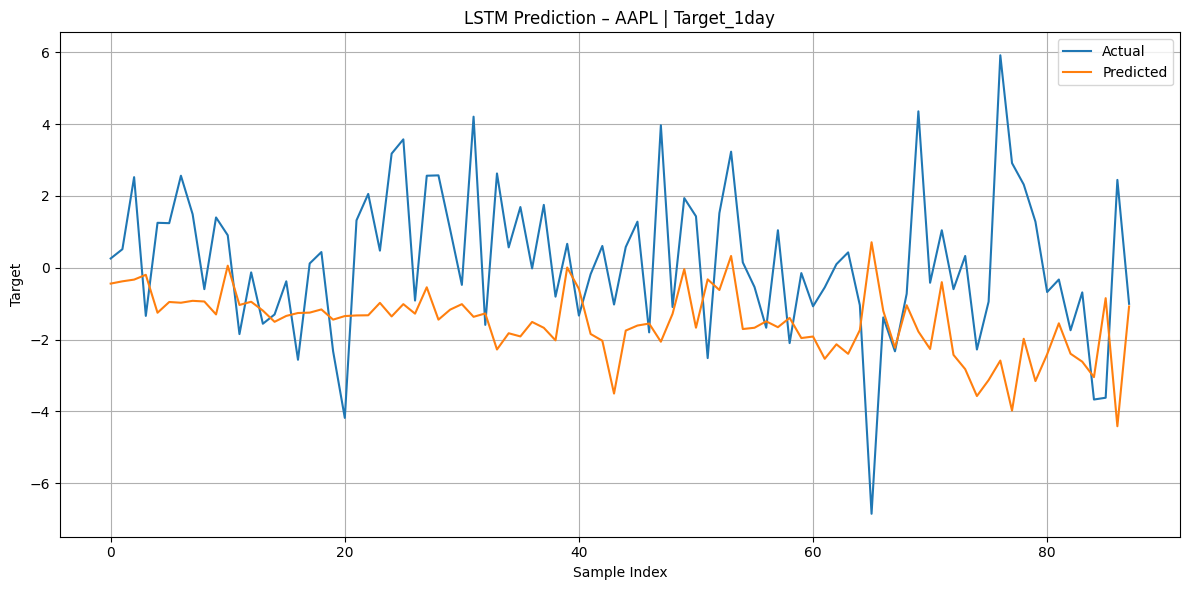

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step

 [AAPL] Target: Target_1week
MAE : 4.7987
RMSE: 5.9229
R²   : -0.1811


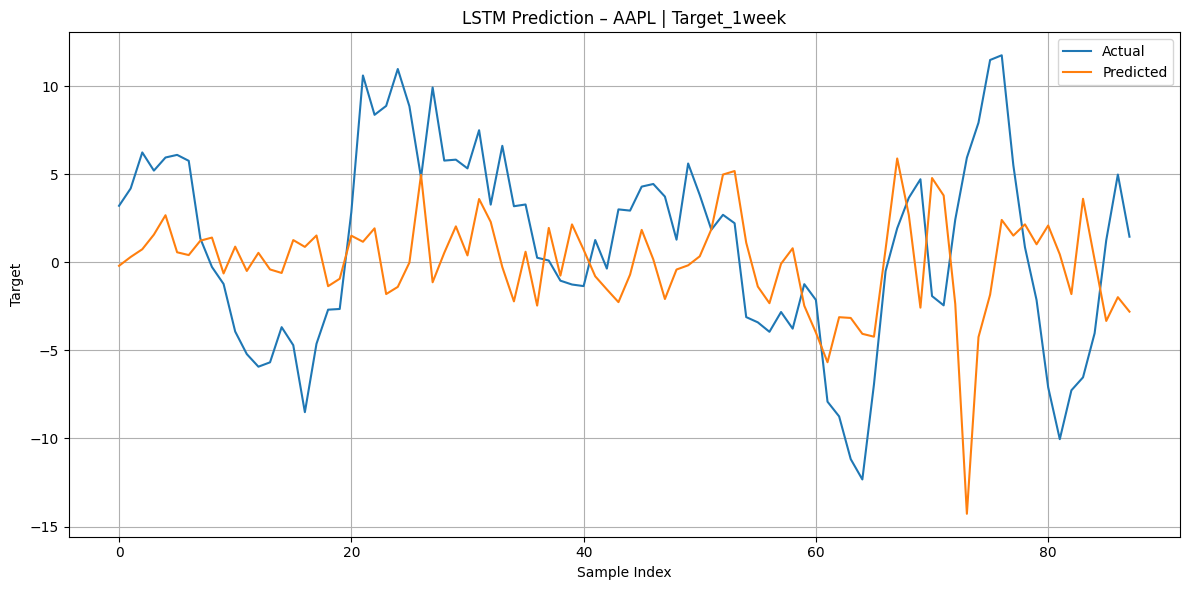

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step

 [AAPL] Target: Target_1month
MAE : 11.3359
RMSE: 13.8835
R²   : -1.2571


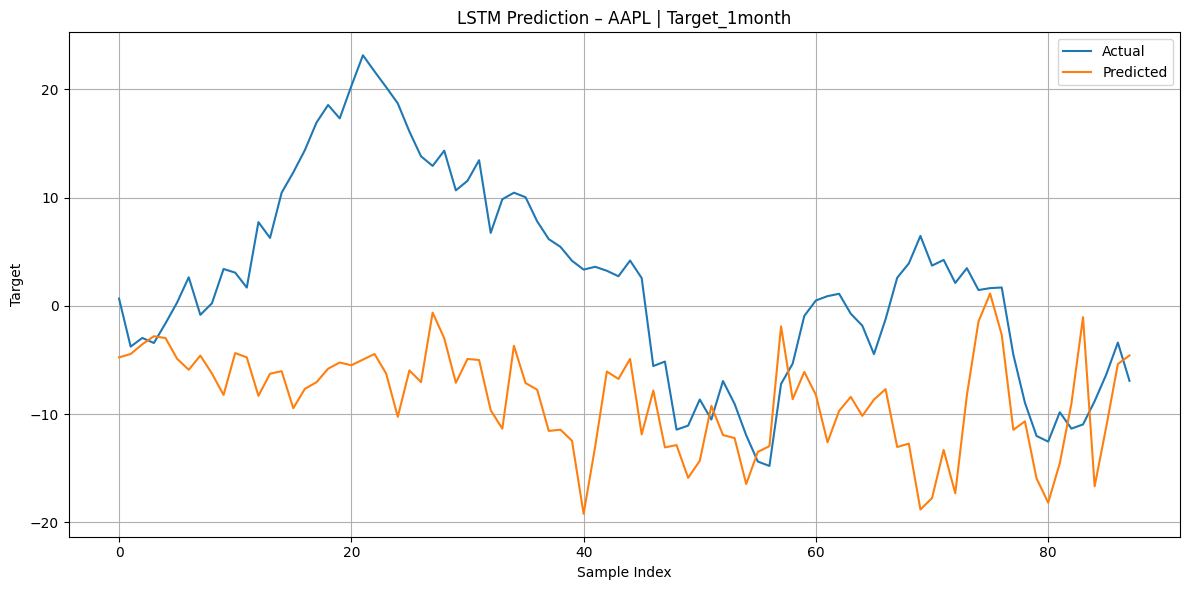

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step

 [AAPL] Target: Target_1year
MAE : 35.5983
RMSE: 37.5369
R²   : -14.5362


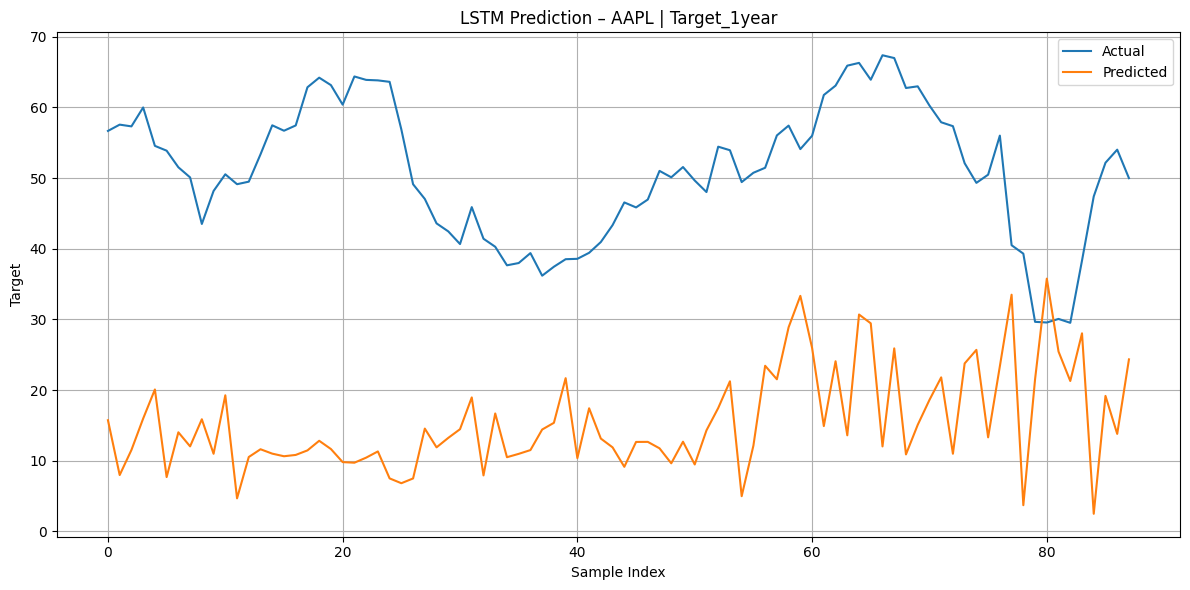

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step

 [AMD] Target: Target_1day
MAE : 3.7105
RMSE: 5.7630
R²   : -1.1387


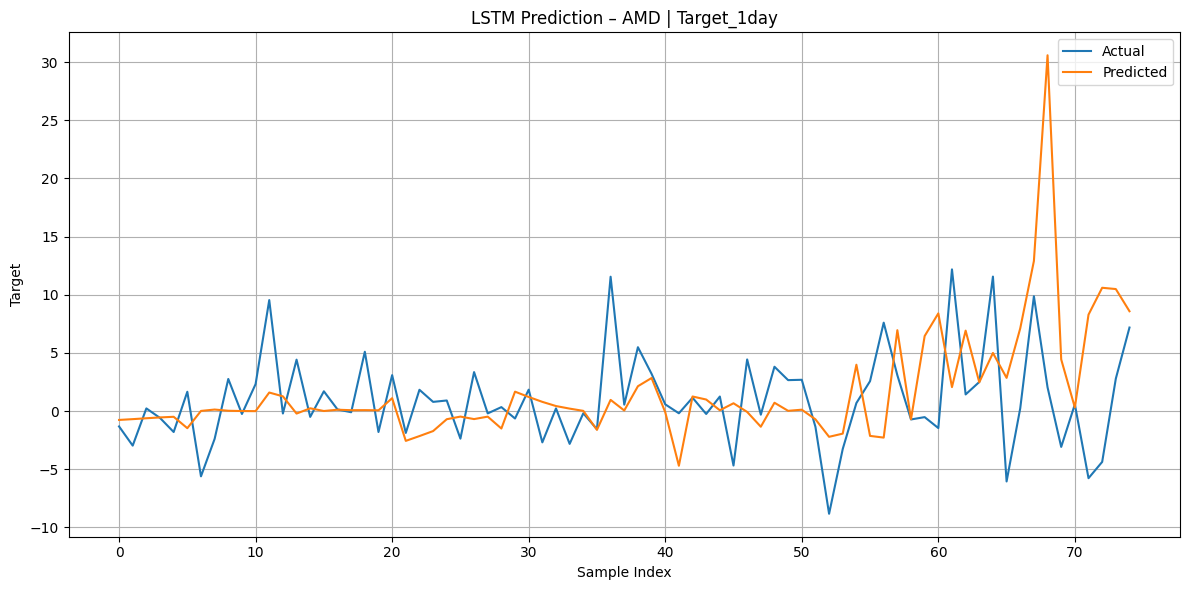

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step

 [AMD] Target: Target_1week
MAE : 9.1232
RMSE: 11.2611
R²   : -0.7866


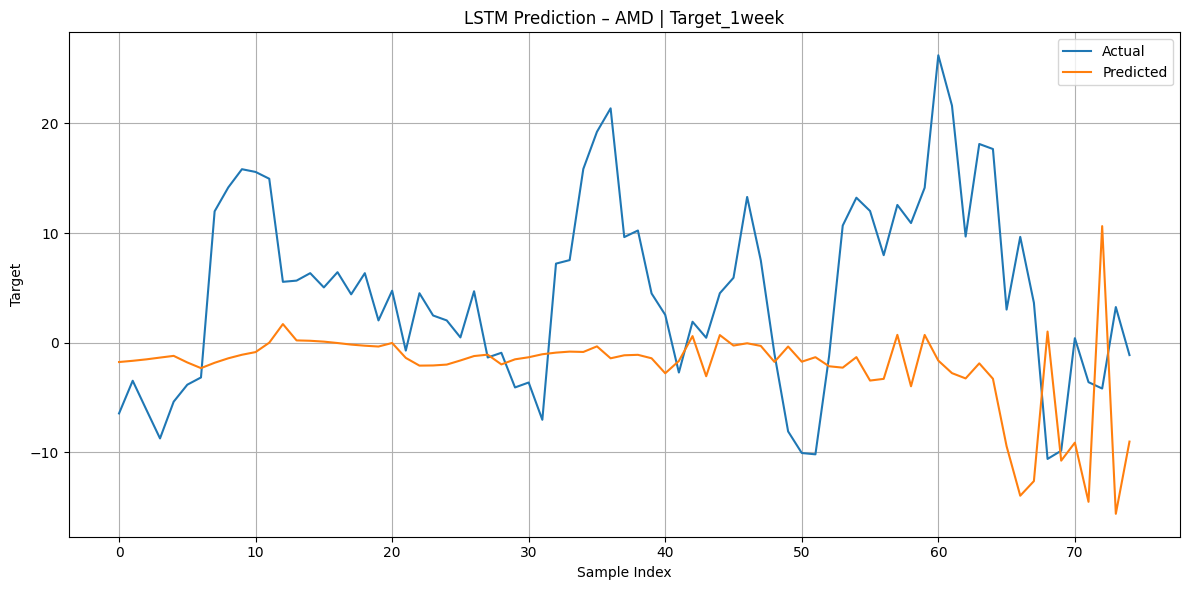

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step

 [AMD] Target: Target_1month
MAE : 22.4630
RMSE: 24.0628
R²   : -4.7341


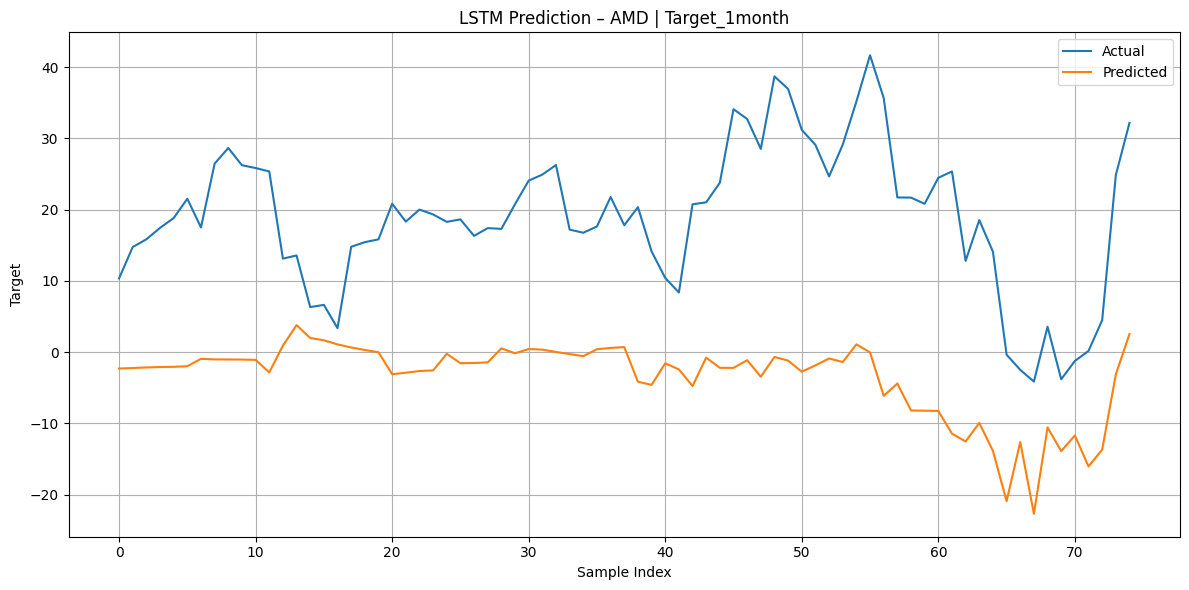

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step

 [AMD] Target: Target_1year
MAE : 25.9616
RMSE: 29.9754
R²   : 0.3101


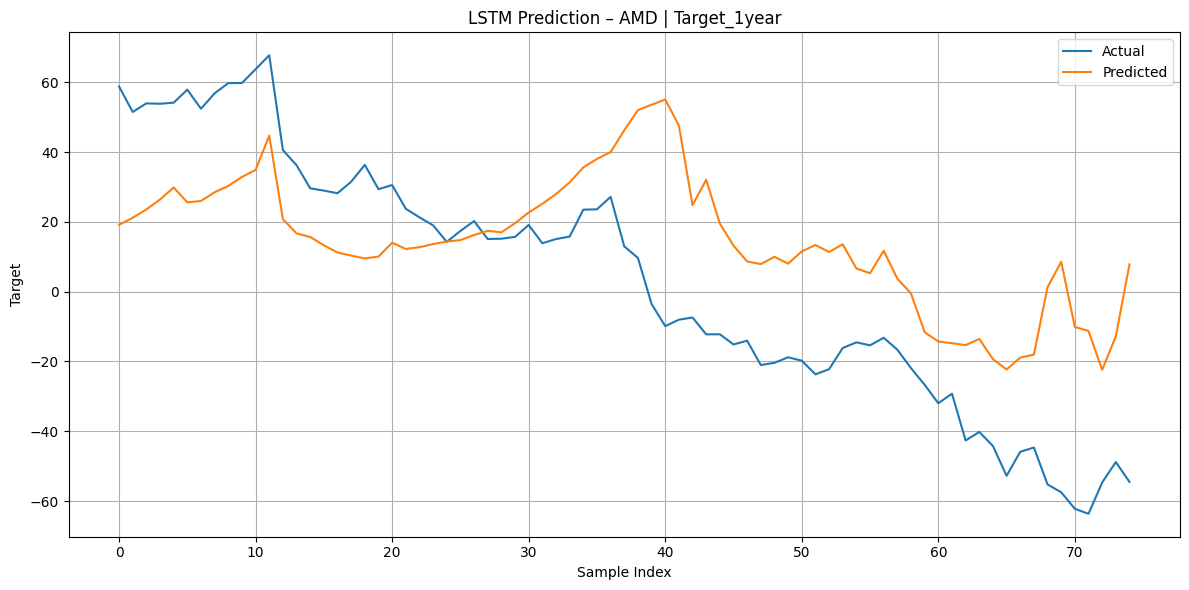

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step

 [AMZN] Target: Target_1day
MAE : 2.2318
RMSE: 3.0878
R²   : -0.2832


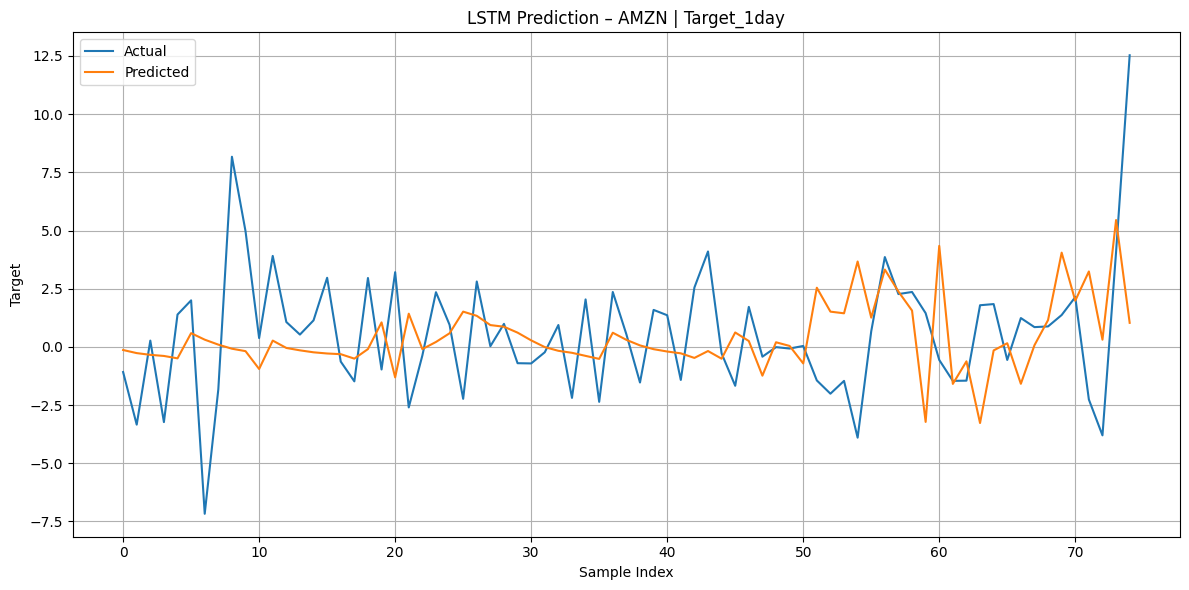

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step

 [AMZN] Target: Target_1week
MAE : 5.0551
RMSE: 6.2375
R²   : -0.3764


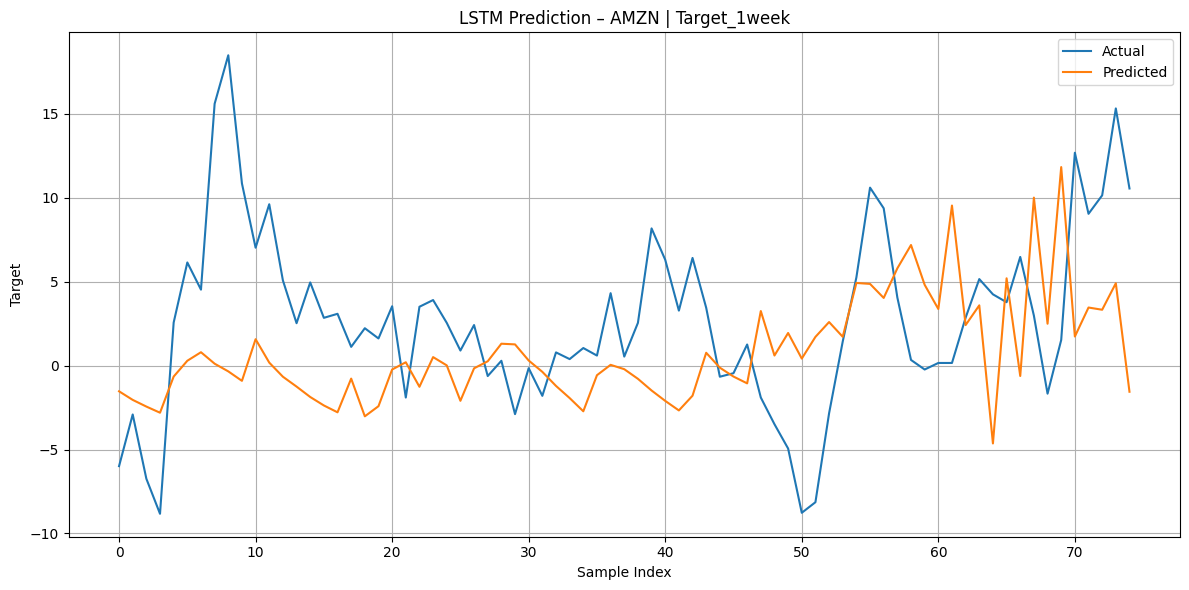

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step

 [AMZN] Target: Target_1month
MAE : 10.5728
RMSE: 12.9571
R²   : -2.3633


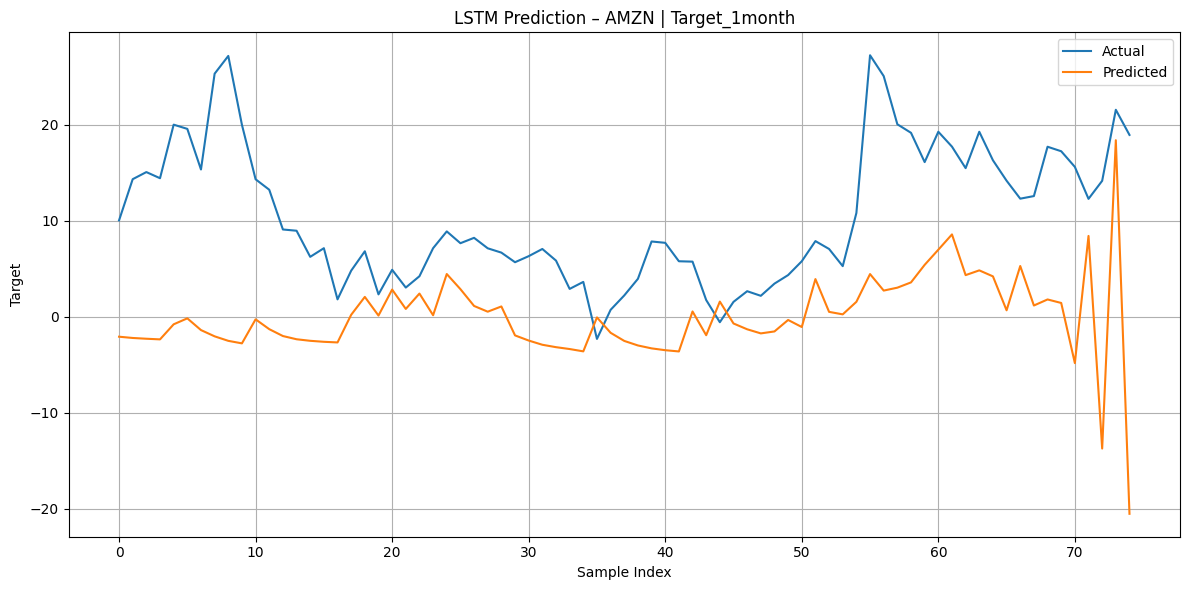

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step

 [AMZN] Target: Target_1year
MAE : 25.1802
RMSE: 30.3929
R²   : -11.0491


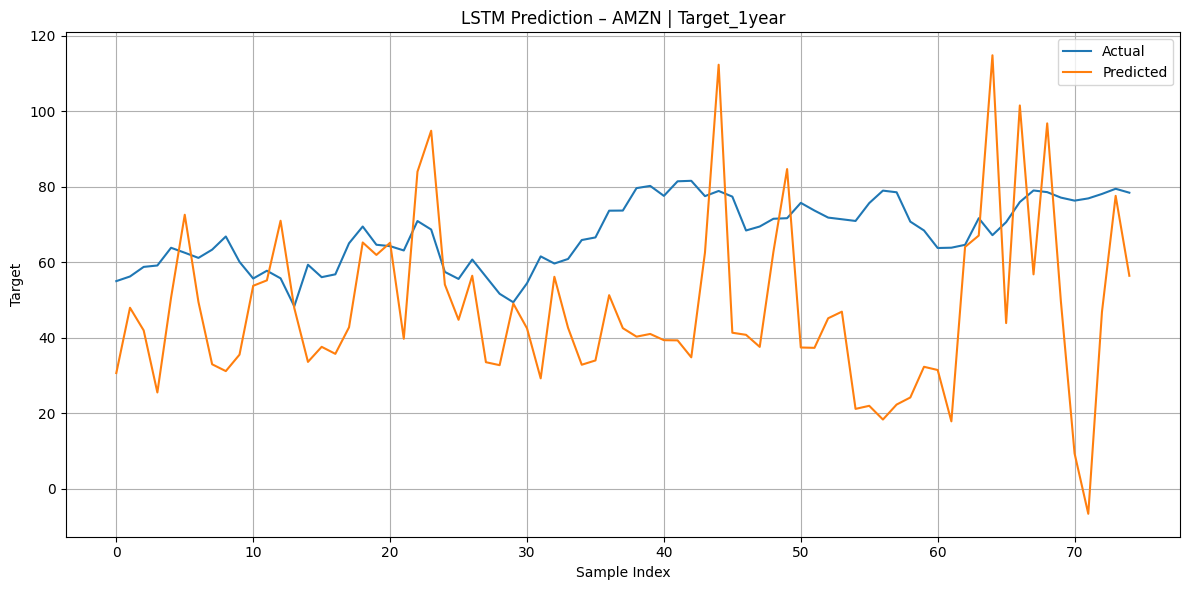

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step

 [AVGO] Target: Target_1day
MAE : 4.6280
RMSE: 5.8883
R²   : -7.3254


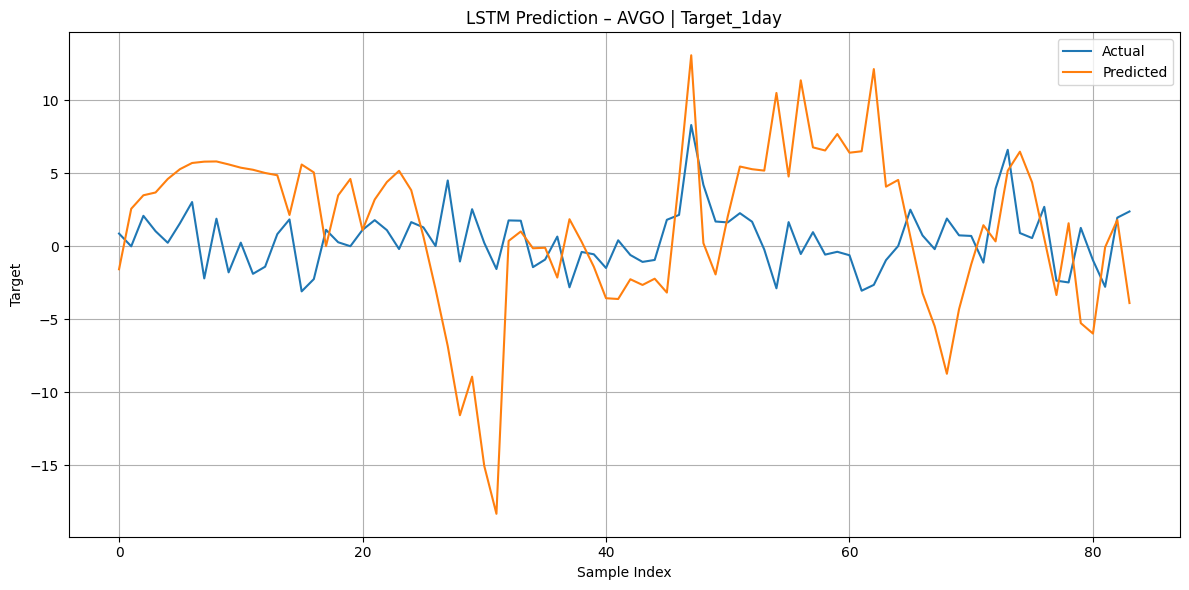

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step

 [AVGO] Target: Target_1week
MAE : 7.3854
RMSE: 9.9832
R²   : -1.8575


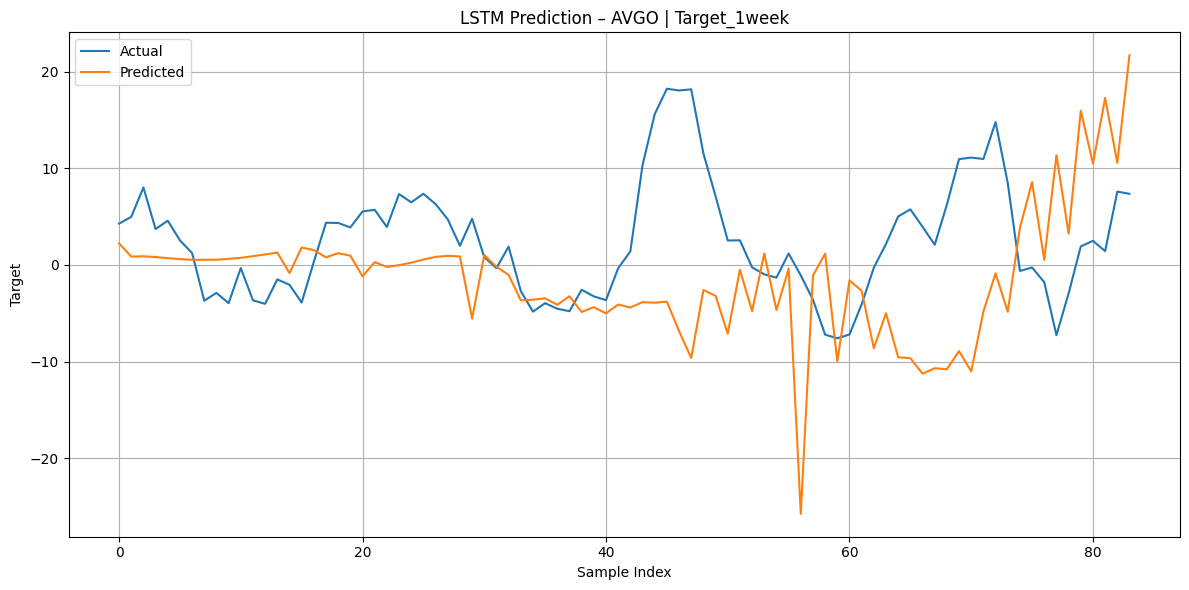

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step

 [AVGO] Target: Target_1month
MAE : 10.7260
RMSE: 13.9422
R²   : -5.0415


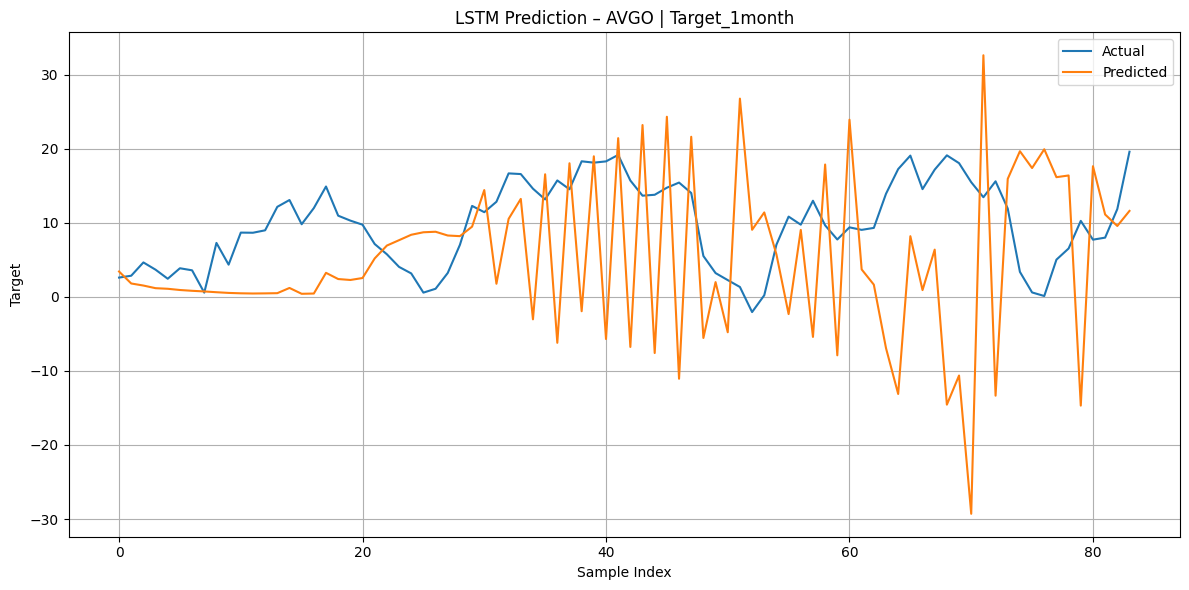

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step

 [AVGO] Target: Target_1year
MAE : 28.9440
RMSE: 38.7086
R²   : -2.8158


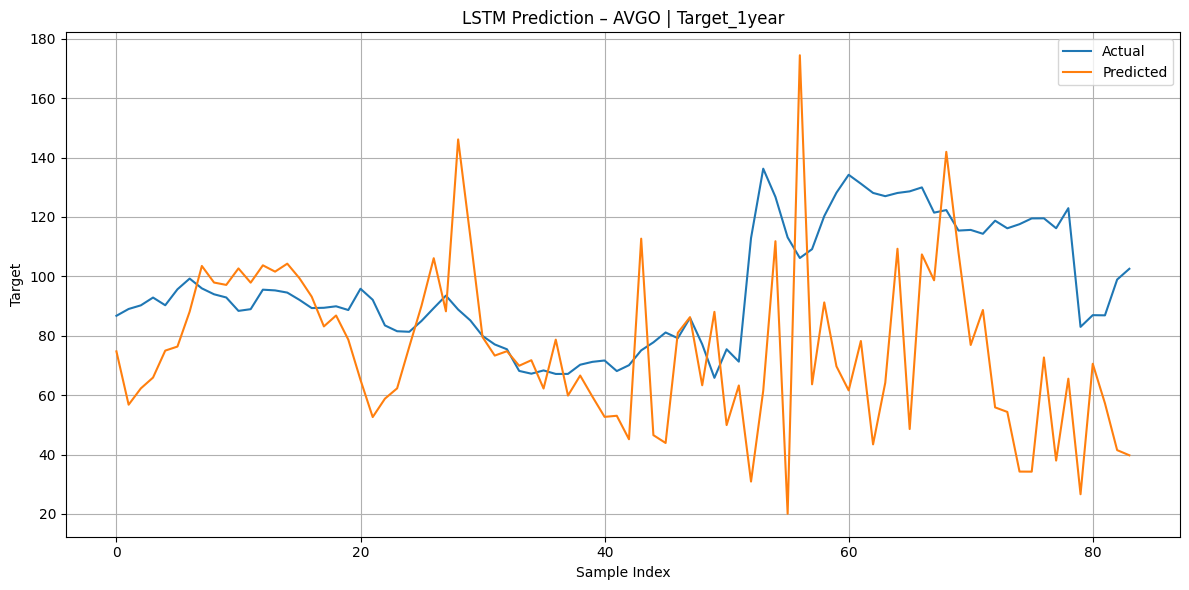

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step

 [GOOGL] Target: Target_1day
MAE : 5.3697
RMSE: 8.7991
R²   : -9.9773


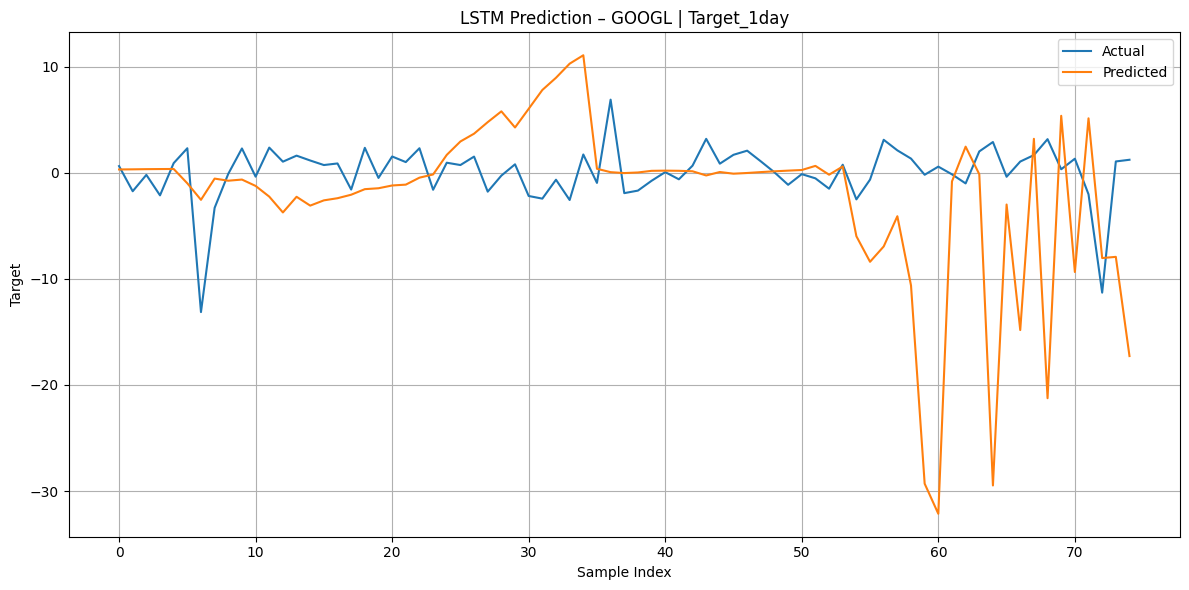

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step

 [GOOGL] Target: Target_1week
MAE : 4.5197
RMSE: 6.2860
R²   : -0.1041


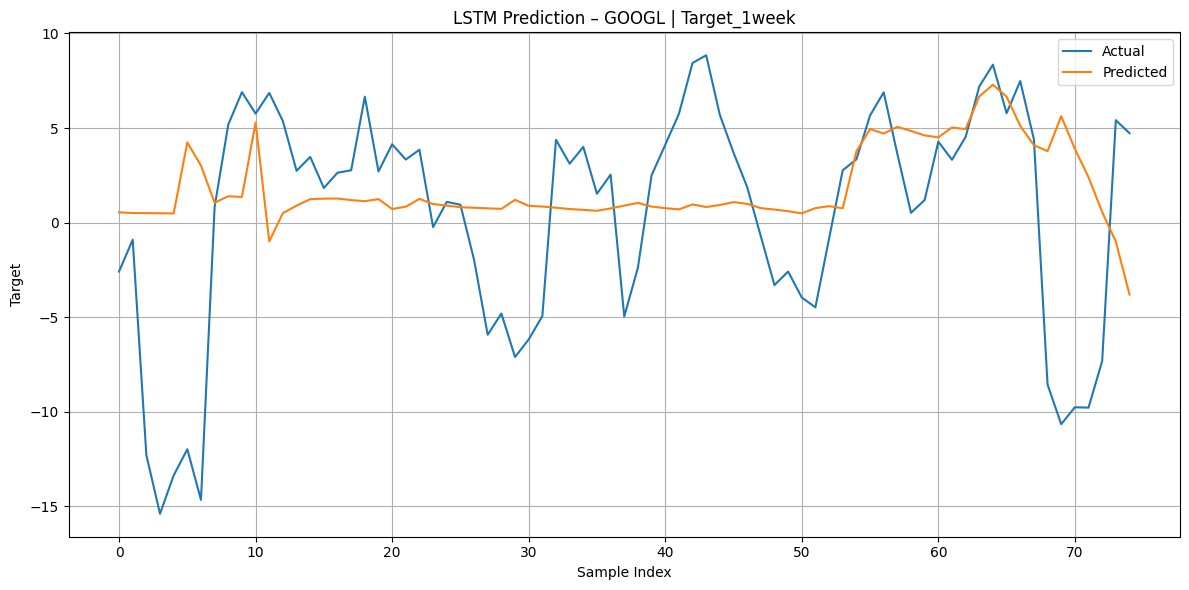

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step

 [GOOGL] Target: Target_1month
MAE : 26.2676
RMSE: 38.5952
R²   : -34.1810


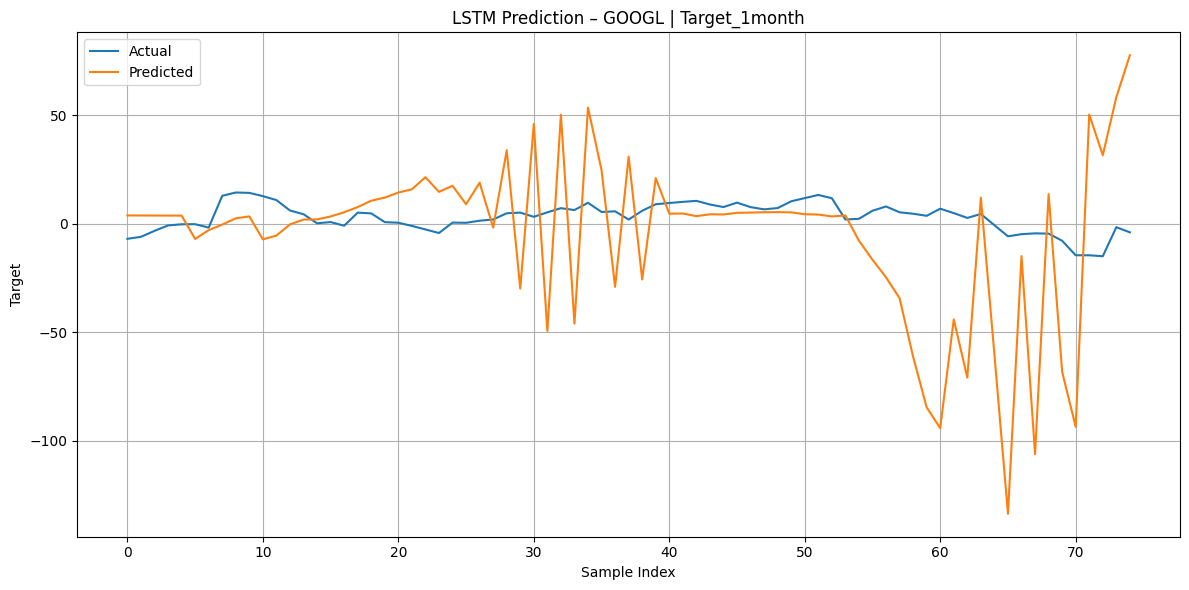

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step

 [GOOGL] Target: Target_1year
MAE : 58.4482
RMSE: 84.5867
R²   : -74.5334


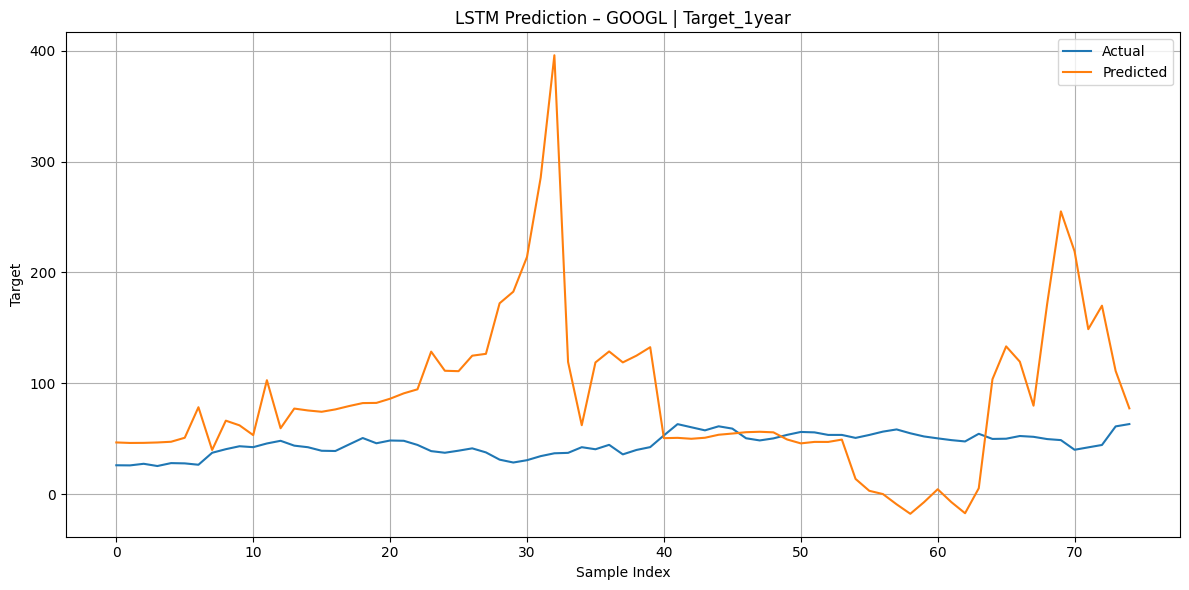

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step

 [META] Target: Target_1day
MAE : 6.5857
RMSE: 10.5522
R²   : -0.0185


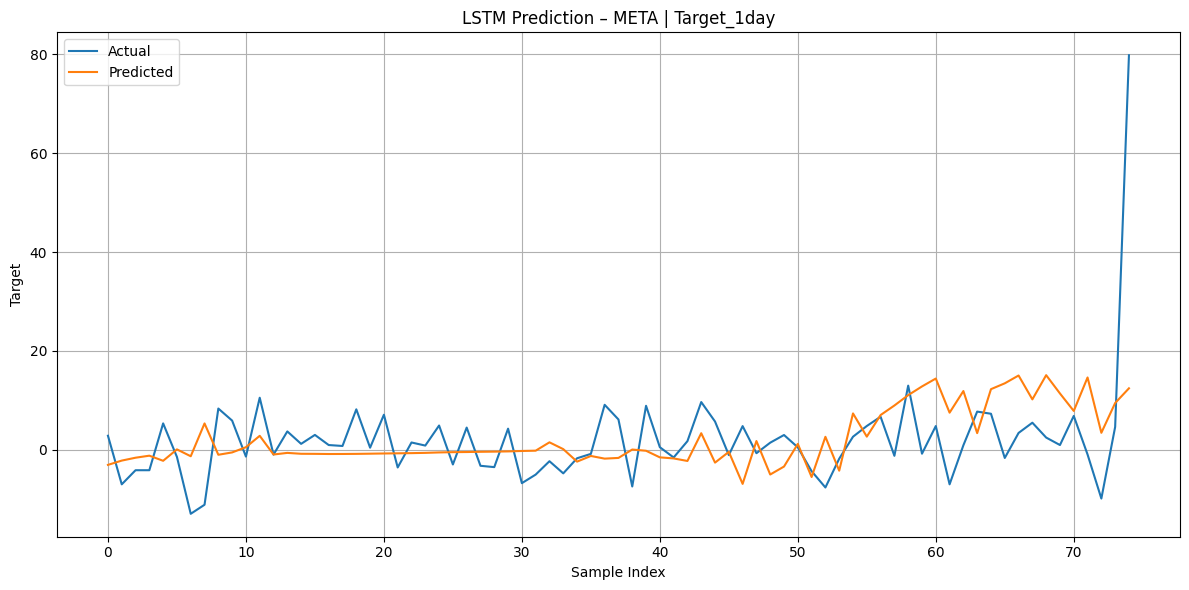

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step

 [META] Target: Target_1week
MAE : 15.5634
RMSE: 23.1373
R²   : -0.3441


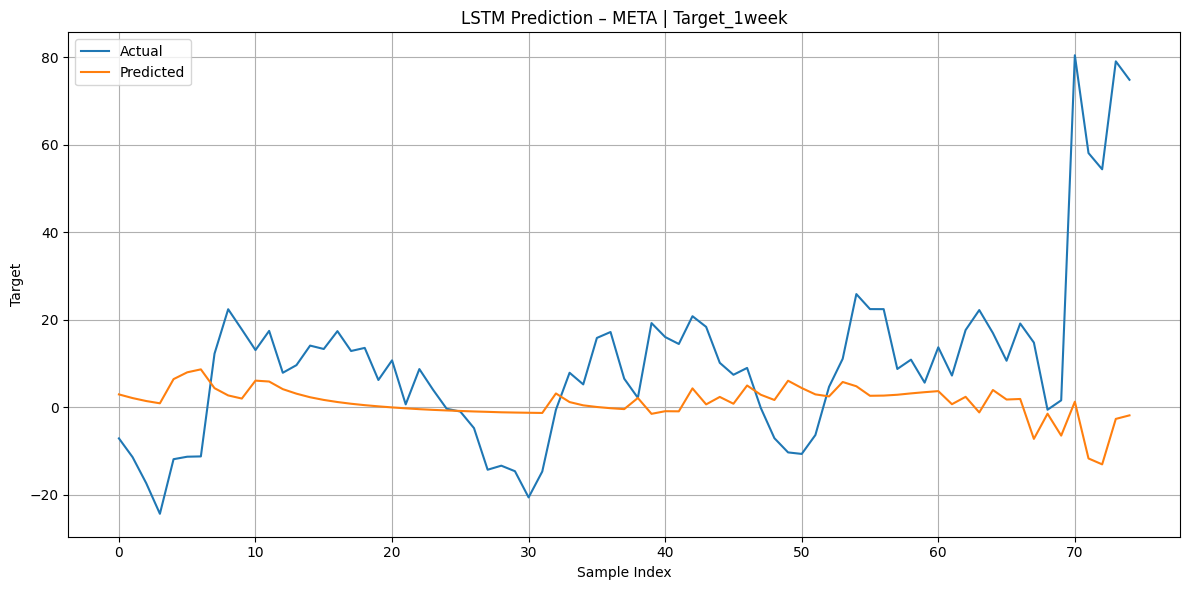

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step

 [META] Target: Target_1month
MAE : 33.5451
RMSE: 45.3872
R²   : -0.6551


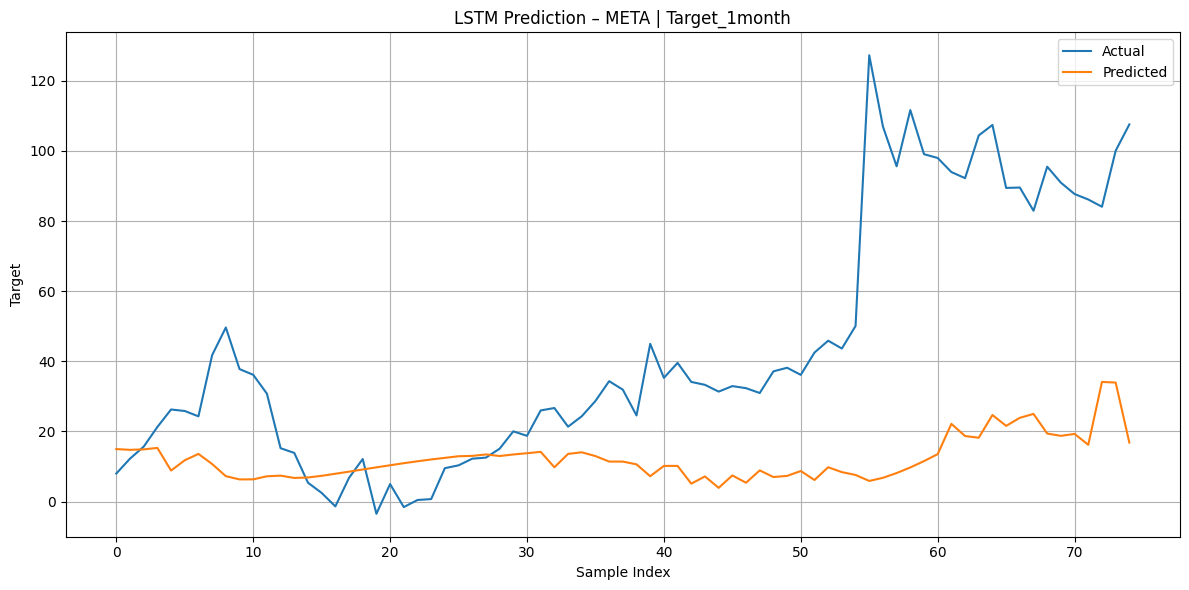

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step

 [META] Target: Target_1year
MAE : 85.7422
RMSE: 100.0090
R²   : -20.7011


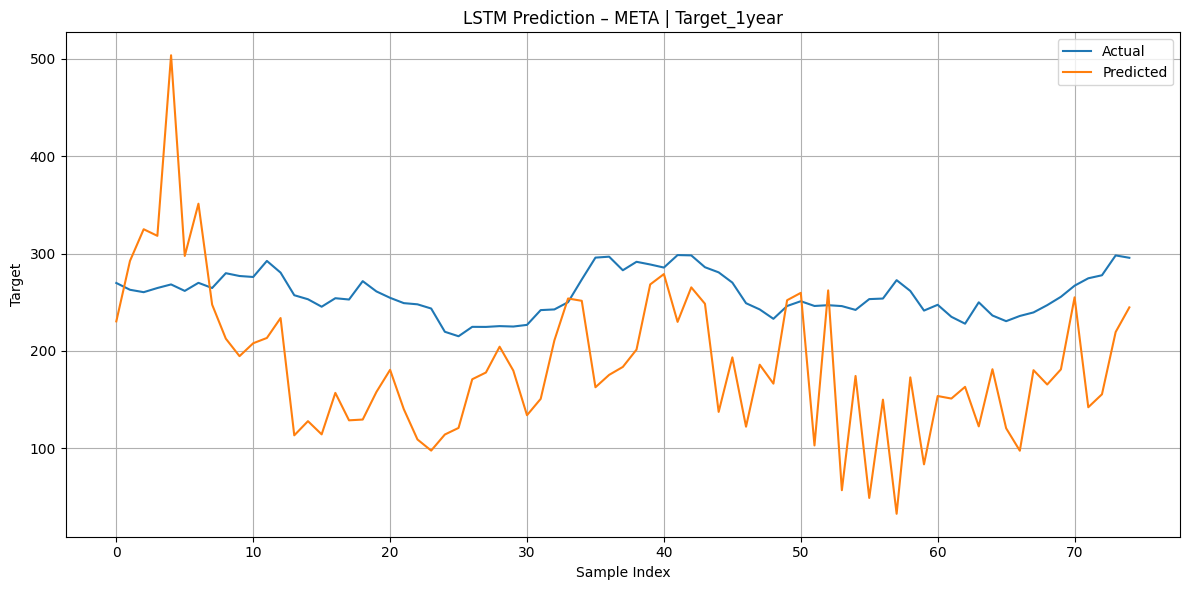

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step

 [MSFT] Target: Target_1day
MAE : 3.6515
RMSE: 4.5311
R²   : -0.0746


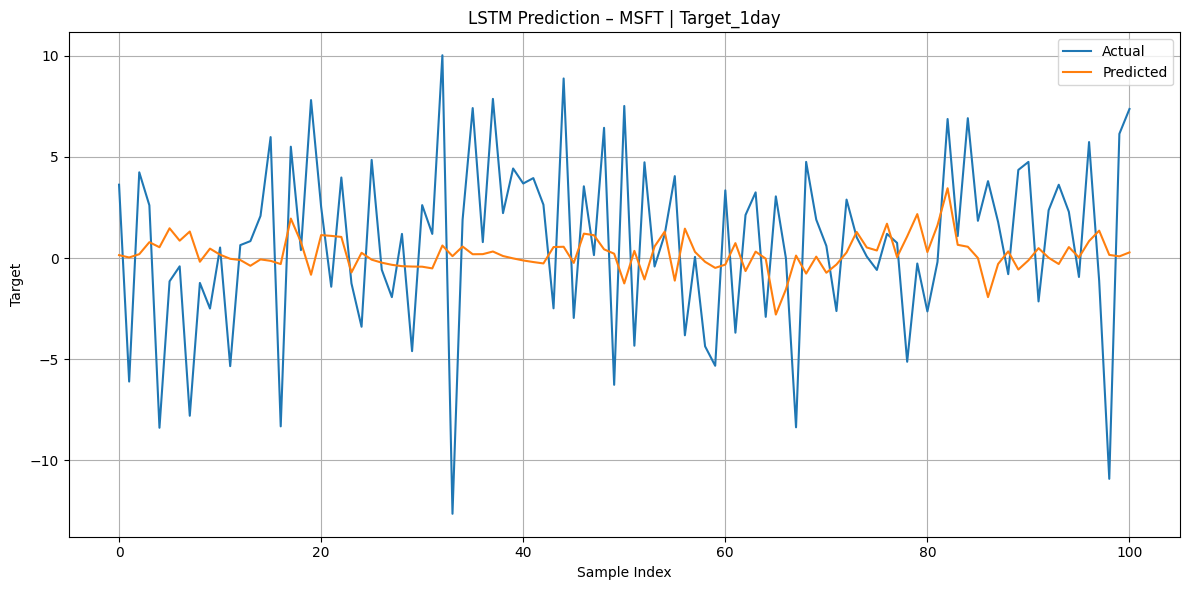

<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step

 [MSFT] Target: Target_1week
MAE : 7.9827
RMSE: 9.7324
R²   : -0.2071


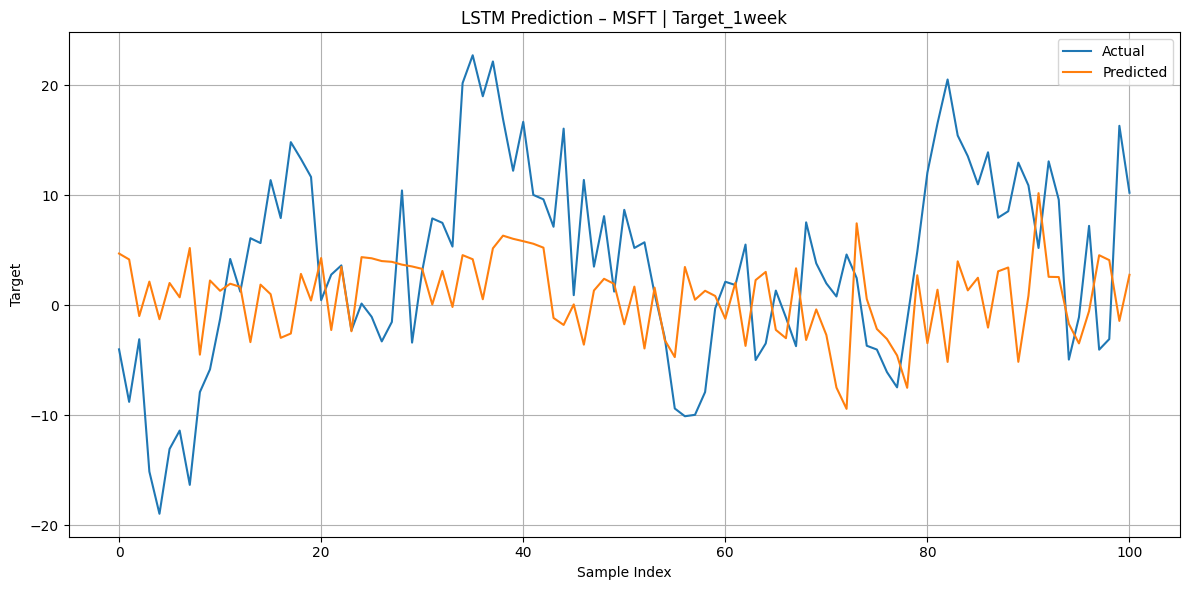

<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step

 [MSFT] Target: Target_1month
MAE : 18.9430
RMSE: 24.3468
R²   : -1.2597


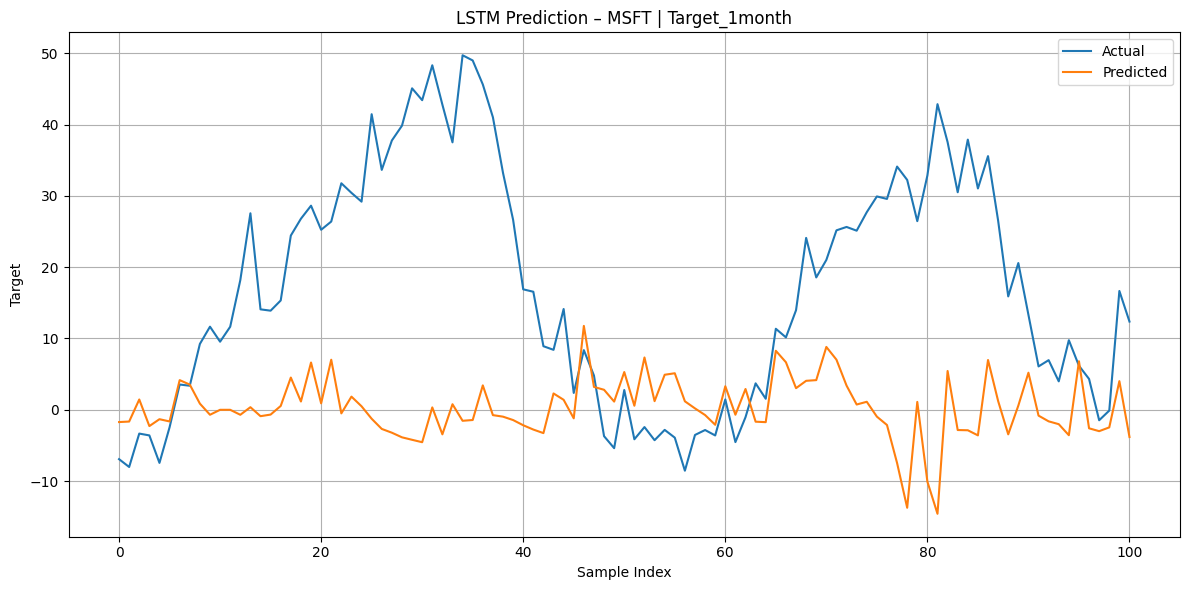

<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step

 [MSFT] Target: Target_1year
MAE : 49.2354
RMSE: 56.6722
R²   : -3.7166


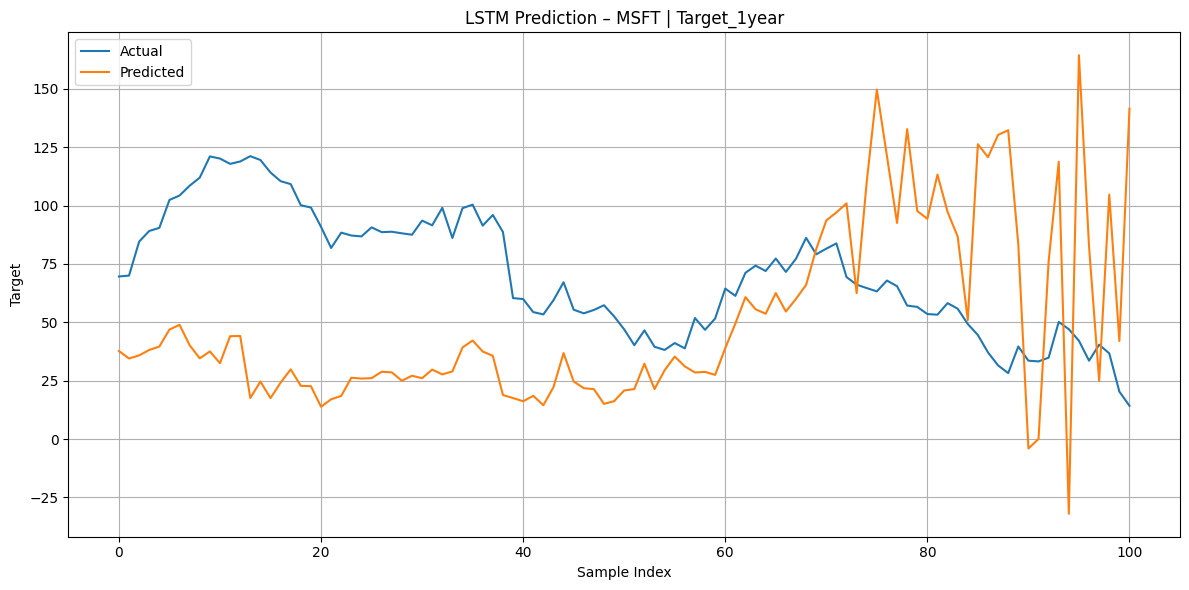

<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step

 [NVDA] Target: Target_1day
MAE : 1.5551
RMSE: 6.5029
R²   : -38.8750


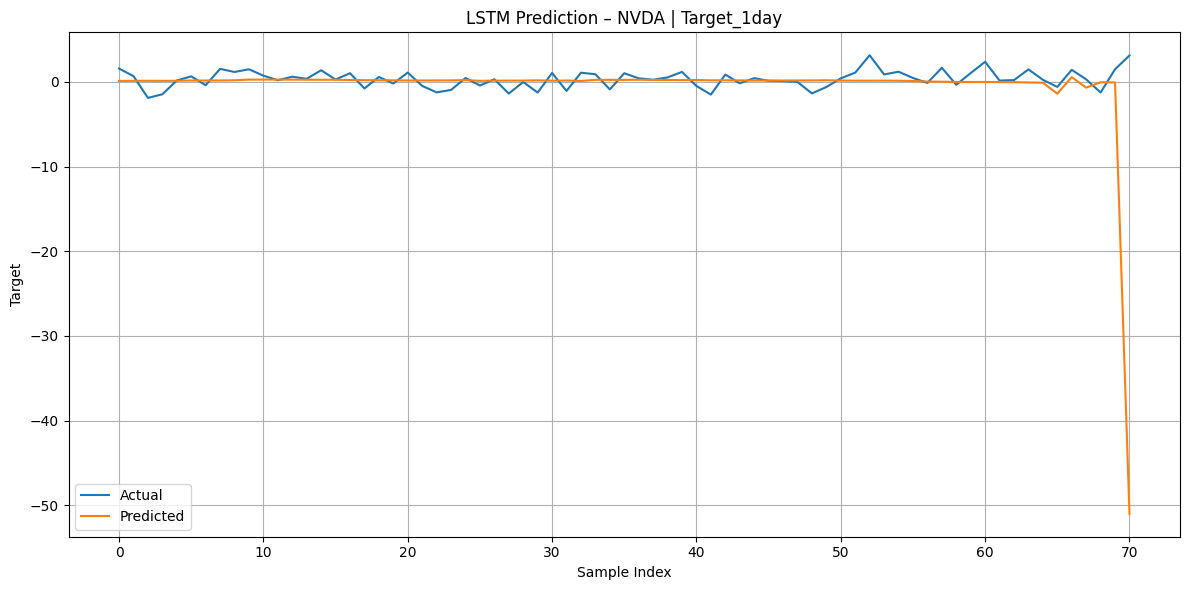

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step

 [NVDA] Target: Target_1week
MAE : 2.4085
RMSE: 2.9963
R²   : -0.2016


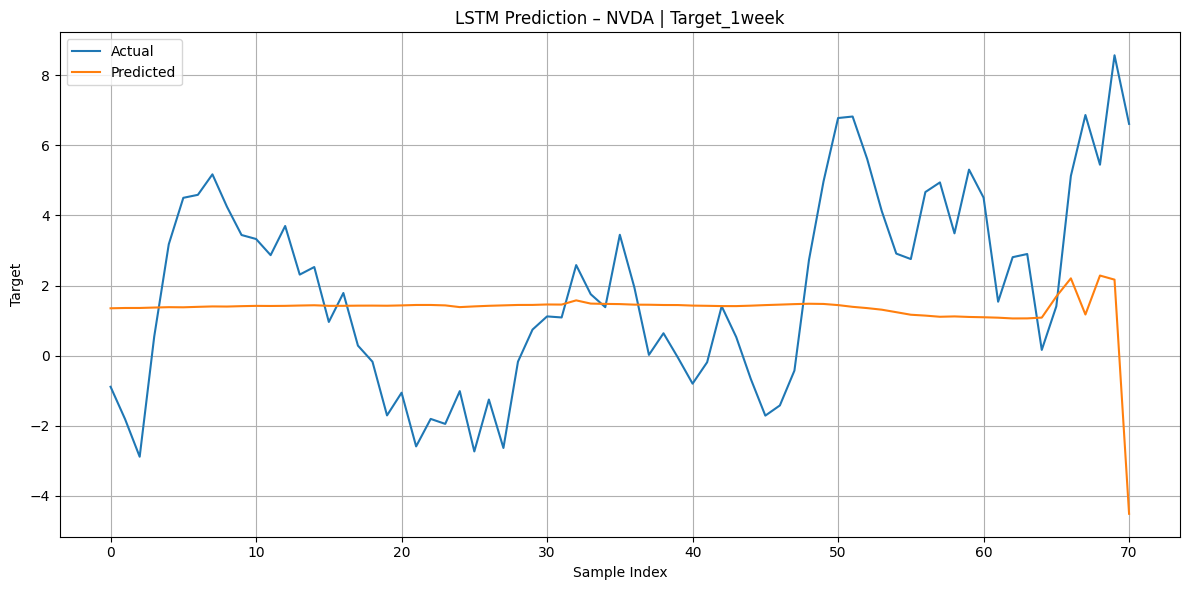

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step

 [NVDA] Target: Target_1month
MAE : 7.1182
RMSE: 8.9266
R²   : -0.8317


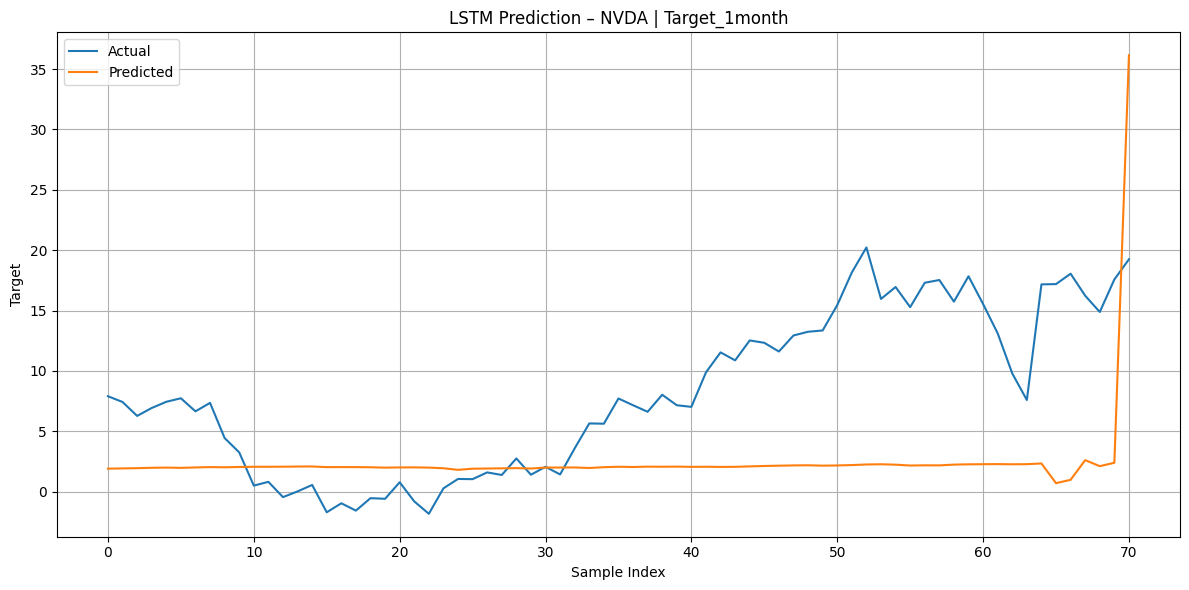

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step

 [NVDA] Target: Target_1year
MAE : 10.4204
RMSE: 13.5673
R²   : -0.7551


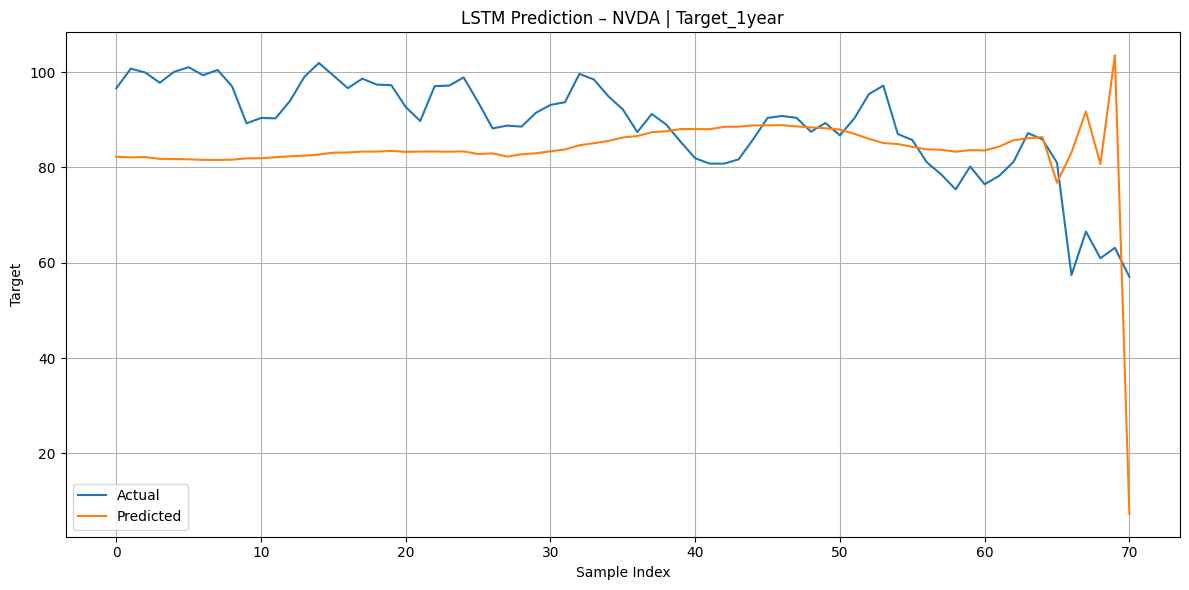

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step

 [ORCL] Target: Target_1day
MAE : 1.5519
RMSE: 2.6788
R²   : -0.0326


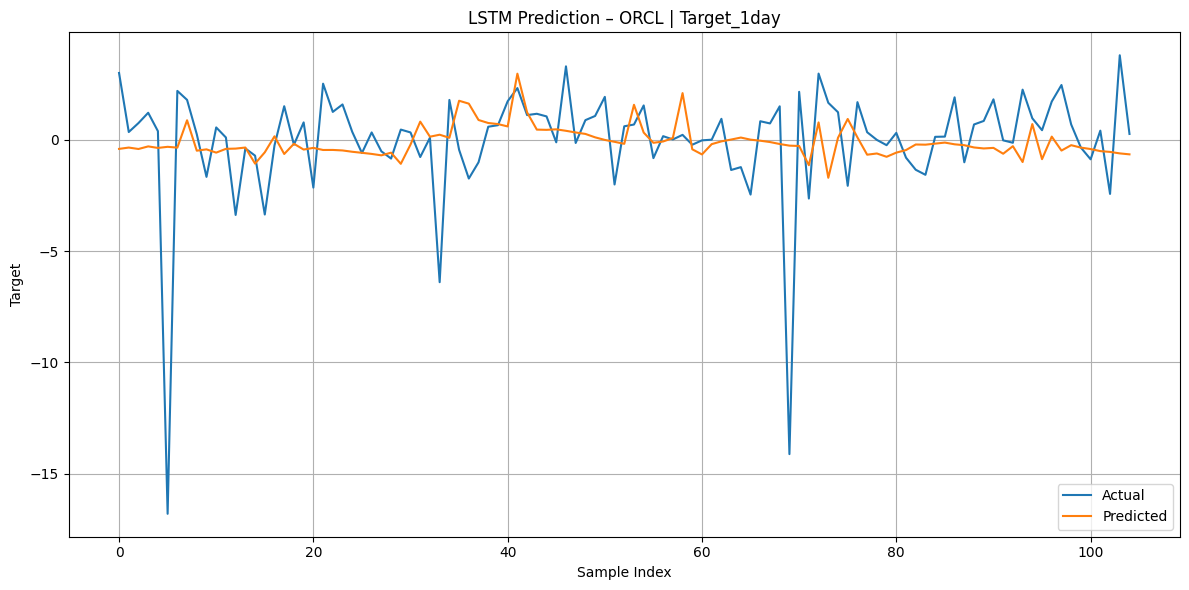

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step

 [ORCL] Target: Target_1week
MAE : 4.2193
RMSE: 5.5501
R²   : -0.1406


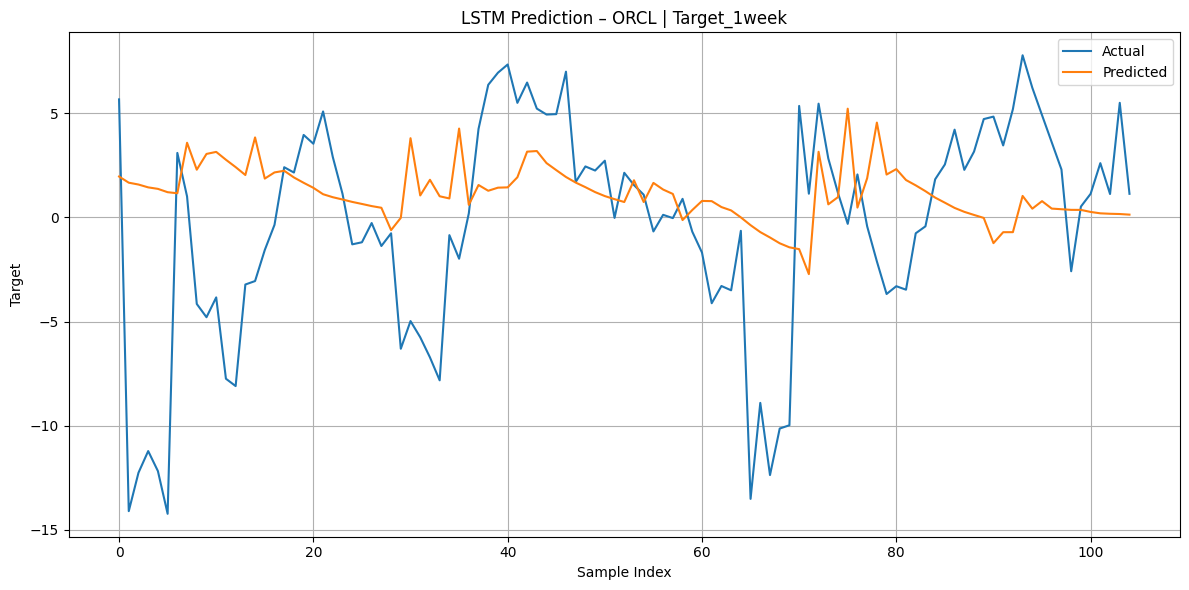

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step

 [ORCL] Target: Target_1month
MAE : 7.4510
RMSE: 9.0501
R²   : -0.0163


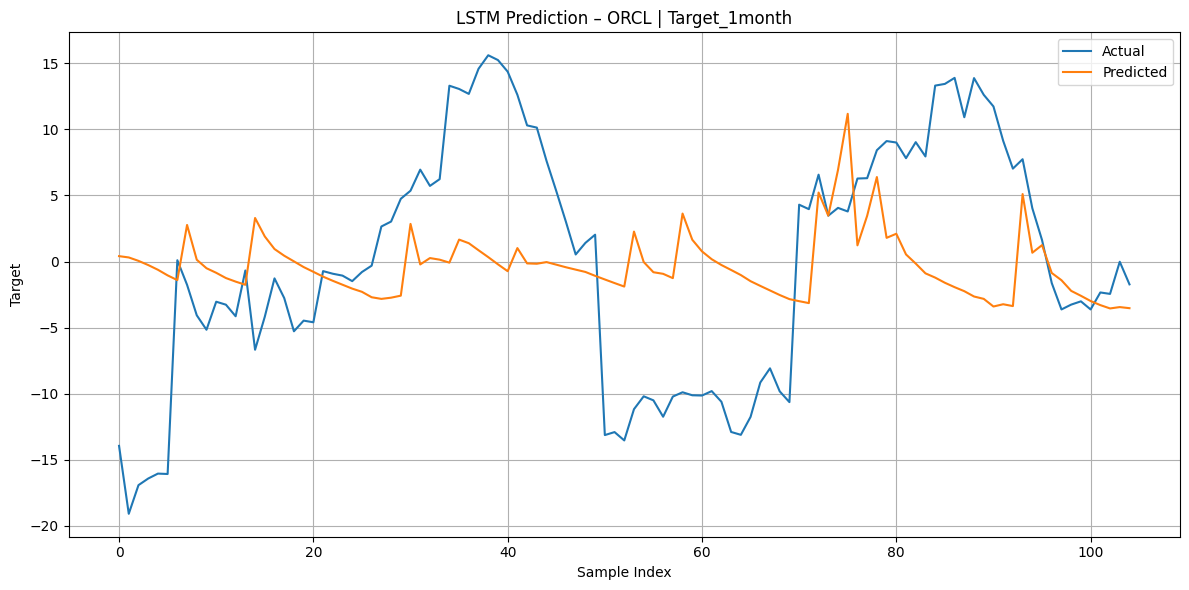

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step

 [ORCL] Target: Target_1year
MAE : 42.2138
RMSE: 44.1206
R²   : -9.3119


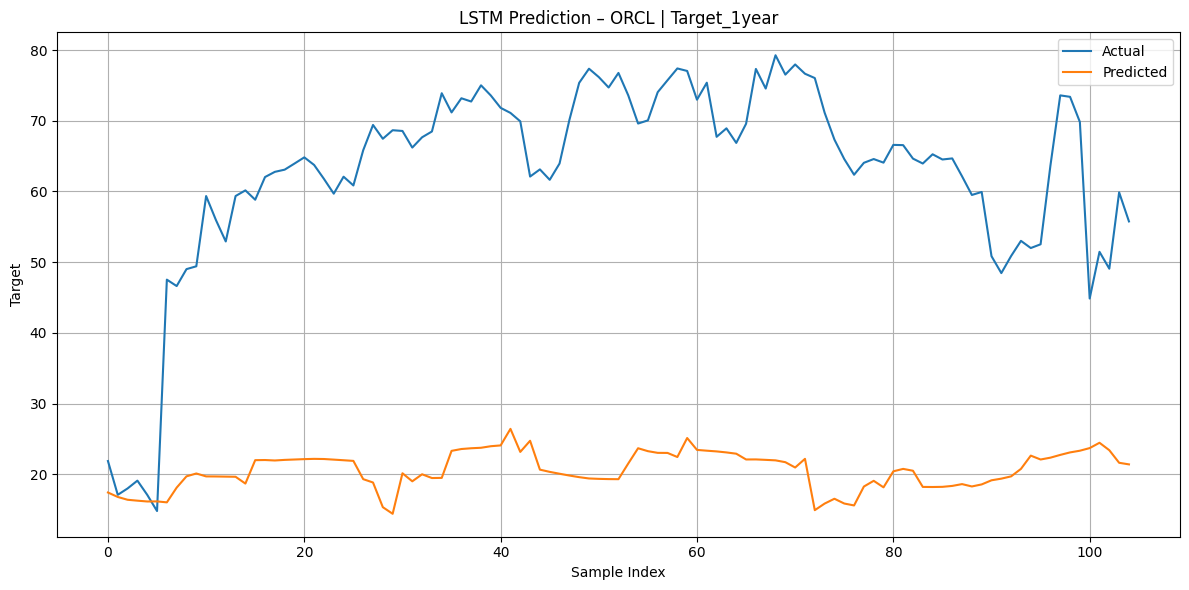

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step

 [TSLA] Target: Target_1day
MAE : 4.9506
RMSE: 6.5866
R²   : 0.0370


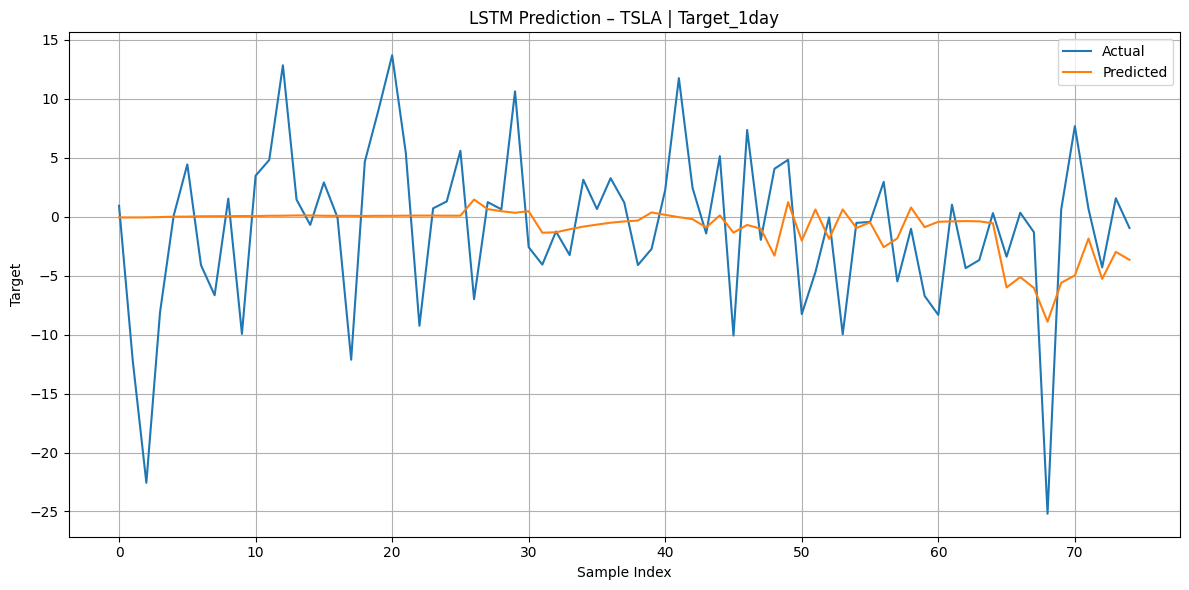

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step

 [TSLA] Target: Target_1week
MAE : 11.1046
RMSE: 14.3473
R²   : -0.0061


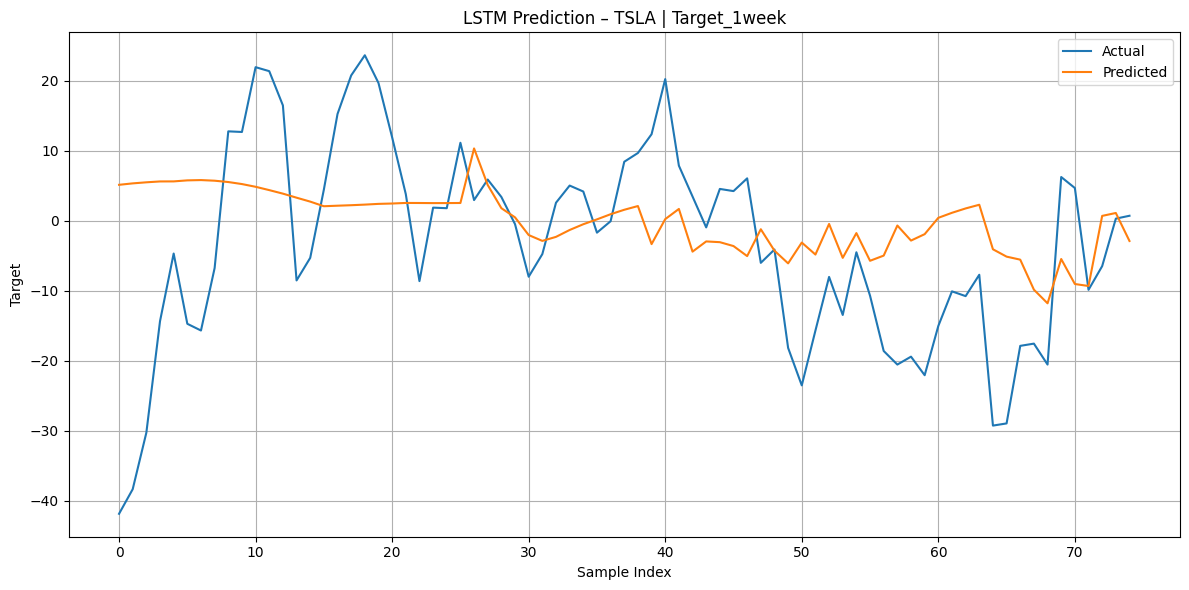

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step

 [TSLA] Target: Target_1month
MAE : 20.4945
RMSE: 26.3707
R²   : 0.2542


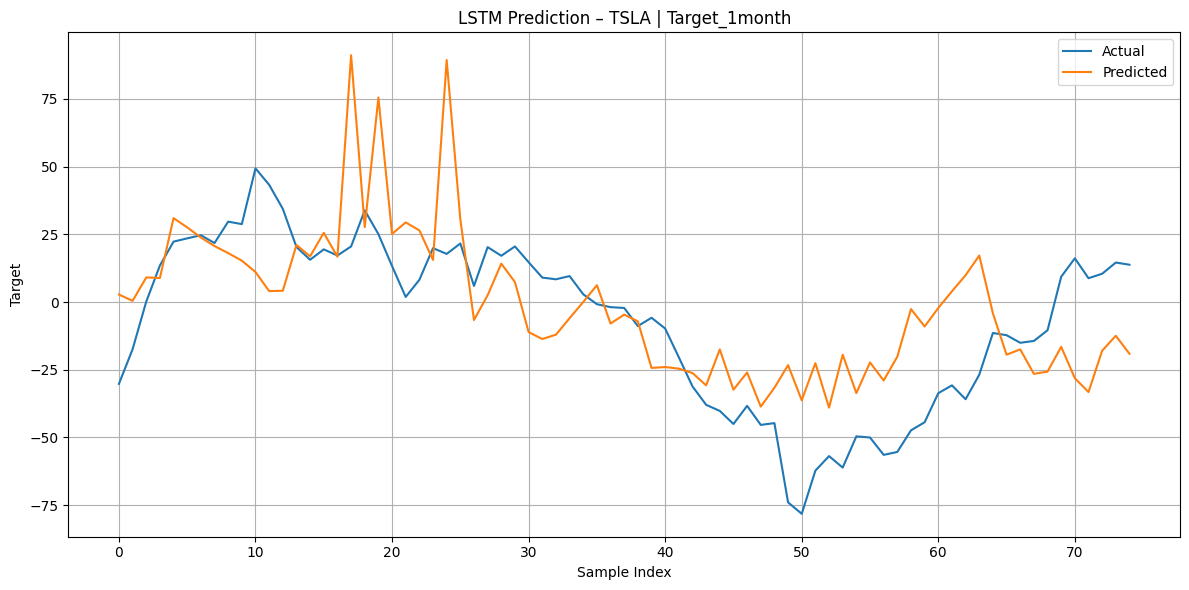

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step

 [TSLA] Target: Target_1year
MAE : 139.1111
RMSE: 159.1333
R²   : -3.9340


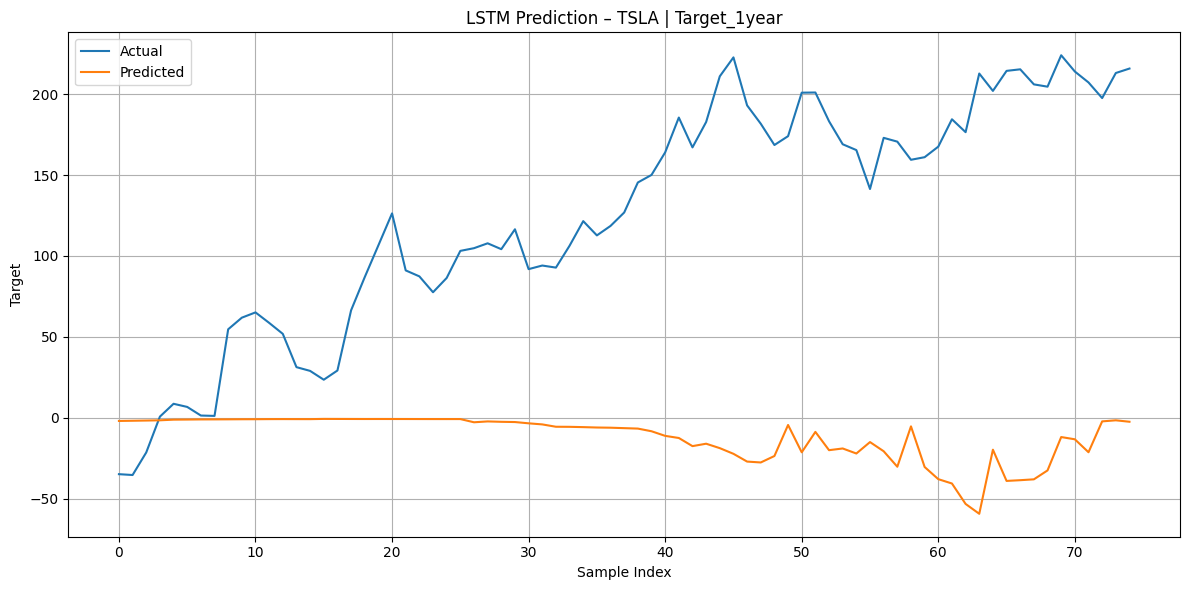

In [ ]:
tickers_to_run = df['Ticker'].unique()
targets = ['Target_1day', 'Target_1week', 'Target_1month', 'Target_1year']

for ticker in tickers_to_run:
    for target in targets:
        run_lstm_by_ticker(df, ticker, target)


other test